## Deliverable 1 - Food, Liquor and Consumer

In [94]:
import pandas as pd
import numpy as np

df_consumer = pd.read_csv("consumers.csv")
df_food = pd.read_csv("Food.csv")
df_alcohol = pd.read_csv("Alcohol.csv")
df_fund = pd.read_csv("Fund.csv")
df_fund = df_fund.dropna()
df_consumer.head()

,license_num,historicallicensenum,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,applicant,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,LB-485386,NaN,Active,Misc,Retail Malt Wine,NaN,NaN,Dorchester Market LLC,Dorchester Market,NaN,...,Dorchester Market LLC,Peter McGee,(617)238-7406,NaN,951- Dorchester AV,Dorchester,MA,02125,775975.718316,2.941310e+06
1,LB-481806,NaN,Active,CV,Common Victualler,2022-10-13,2022-12-31,"Food's Style USA, Inc.",Hokkaido Ramen Santouka,NaN,...,"Food's Style USA, Inc.",Tatsunori Tanaka,(206)889-2069,NaN,169- Brighton AVE,Allston,MA,02134,755551.338475,2.953982e+06
2,LB-492447,NaN,Active,CV,Common Victualler,2022-10-03,2022-12-31,Tori EB Food Inc.,Tori Japan,NaN,...,Tori EB Food Inc.,Min Zhu,(781)609-8753,NaN,62- William C Kelly SQ,East Boston,MA,02128,780480.291321,2.961768e+06
3,LB-481088,NaN,Active,CV,CV7ALN - Neighborhood Restricted,2022-09-29,2022-12-31,Yak Thai Inc.,Thonglor,NaN,...,Yak Thai Inc.,Piyapong Wongla,(781)472-0835,NaN,559- Washington ST,Brighton,MA,02135,747073.290888,2.952562e+06
4,LB-423922,NaN,Active,CV,Common Victualler,2022-09-28,2022-12-31,"PNR, LLC",PICK N' ROLL SUSHI,Hours Operation Monday Saturday 11 00 AM 8 PM,...,"PNR, LLC",Victor Choi,(617)251-5829,NaN,134- Boylston ST,Boston,MA,02116,773444.046428,2.953698e+06


In [95]:
df_food.head()

,BusinessName,DBAName,Address,CITY,State,ZIP,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude
0,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,02132,Active,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.15741
1,100 Federal Market & Barista- 11th Floor,NaN,100 Federal,Boston,MA,02110,Active,FT,Eating & Drinking w/ Take Out,2021-01-12 10:37:24,16174345000,57150.0,42.354770,-71.05613
2,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,02130,Active,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.11386
3,11 Dining -16th Fl.,NaN,200 Berkeley,Boston,MA,02116,Active,FS,Eating & Drinking,2019-12-20 09:32:17,10000000000,187943.0,42.349860,-71.07291
4,110 Grill,NaN,25 Jan Karski,Dorchester,MA,02125,Active,FS,Eating & Drinking,2018-11-29 14:14:04,19786929450,421286.0,0.000000,0.00000


In [96]:
df_alcohol.head()

,license_num,historicallicensenum,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,applicant,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,LB-485386,NaN,Active,Retail Malt Wine,NaN,NaN,Dorchester Market LLC,Dorchester Market,NaN,Accessory retail sales of wine & malt beverage...,...,Dorchester Market LLC,Peter McGee,(617)238-7406,NaN,951- Dorchester AV,Dorchester,MA,02125,775975.718316,2.941310e+06
1,LB-481088,NaN,Active,CV7ALN - Neighborhood Restricted,2022-09-29,2022-12-31,Yak Thai Inc.,Thonglor,NaN,"1,000SF: in one room on first floor (seating f...",...,Yak Thai Inc.,Piyapong Wongla,(781)472-0835,NaN,559- Washington ST,Brighton,MA,02135,747073.290888,2.952562e+06
2,LB-476655,NaN,Active,CV7ALN - Neighborhood Restricted,2022-09-26,2022-12-31,HOMESTEAD BAKERY & CAFE LLC,NaN,NaN,homestead bakery & cafe LLC is located on the ...,...,homestead bakery & cafe LLC,Annie Le,(617)858-0468,NaN,1448- Dorchester AVE,Dorchester,MA,02122,775264.770142,2.935071e+06
3,LB-445763,NaN,Active,Retail Malt Wine,2022-08-30,2022-12-31,Grove Hall Foods Corp.,Grove Hall Convenience Market II,NaN,NaN,...,Grove Hall Foods Corp.,Edward Guerrero,(617)708-0775,NaN,292- Talbot AVE,Boston,MA,02124,771330.817625,2.931370e+06
4,LB-469486,NaN,Active,Retail Malt Wine,2022-08-24,2022-12-31,Rupal Corporation,J&J Discount Mini Mart,No singles,Premise is located at 131 West Broadway South ...,...,Rupal Corporation,Michael David Gannon,(617)268-0455,NaN,131- W Broadway,South Boston,MA,02127,776652.999999,2.949530e+06


In [97]:
df_fund.head()

,Business Name,Neighborhood
6,@UNION,Allston
7,3D Printsmith LLC,Allston
8,A-Z Physical Therapy and Wellness,Allston
9,Ada DeTour Photography,Allston
10,ALLSTON BILLIARDS,Allston


In [98]:
df_food.columns = df_food.columns.str.replace('BusinessName', 'business_name')
df_food.head()

,business_name,DBAName,Address,CITY,State,ZIP,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude
0,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,02132,Active,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.15741
1,100 Federal Market & Barista- 11th Floor,NaN,100 Federal,Boston,MA,02110,Active,FT,Eating & Drinking w/ Take Out,2021-01-12 10:37:24,16174345000,57150.0,42.354770,-71.05613
2,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,02130,Active,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.11386
3,11 Dining -16th Fl.,NaN,200 Berkeley,Boston,MA,02116,Active,FS,Eating & Drinking,2019-12-20 09:32:17,10000000000,187943.0,42.349860,-71.07291
4,110 Grill,NaN,25 Jan Karski,Dorchester,MA,02125,Active,FS,Eating & Drinking,2018-11-29 14:14:04,19786929450,421286.0,0.000000,0.00000


In [99]:
df_fund.columns = df_fund.columns.str.replace('Business Name', 'business_name')
df_fund.head()

,business_name,Neighborhood
6,@UNION,Allston
7,3D Printsmith LLC,Allston
8,A-Z Physical Therapy and Wellness,Allston
9,Ada DeTour Photography,Allston
10,ALLSTON BILLIARDS,Allston


In [100]:
common1 = df_consumer.merge(df_fund, on=['business_name'])
common1.to_csv('consumer_fund.csv', index=False)
common1

,license_num,historicallicensenum,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy,Neighborhood
0,LB-358431,NaN,Active,Misc,Famer-Brewery Pouring,2018-05-24,2022-12-31,"Distraction Brewing Company, LLC",NaN,NaN,...,Michael J. Estey,NaN,NaN,2- Belgrade AVE,Roslindale,MA,02131,756249.836806,2.929804e+06,Roslindale
1,LB-358622,NaN,Active,CV,Common Victualler,2018-04-20,2022-12-31,"Charlestown Tea & Treats, Inc.",Charlestown Tea & Treats,Oct March Tues Fri 7 00 AM 3 PM Sat amp Sun 8 ...,...,Tracy Zimmerman,(262)527-3250,NaN,1- Monument AVE,Boston,MA,02129,774404.160231,2.961502e+06,Charlestown
2,LB-143357,NaN,Active,CV,Common Victualler,2015-05-14,2023-12-31,"Chill on Park, LLC",NaN,NaN,...,Wendy Issokson,(617)297-5401,NaN,142- Park ST,Dorchester,MA,02122,775088.099004,2.934147e+06,Dorchester
3,LB-100529,CVICT1366,Active,CV,Common Victualler,2014-04-09,2022-12-31,Mi Finca Mexican Food LLC,NaN,NaN,...,OSCAR BONILLA,(617)325-2885,NaN,4249- Washington ST,Roslindale,MA,02131,756507.000012,2.929350e+06,Roslindale
4,LB-99569,CV7MW0219,Active,CV,CV7 Malt Wine Liq.,2013-11-26,2022-12-31,Casarecce LLC,CASARECCE RESTAURANT,NaN,...,Frank Pellino,(978)758-1021,NaN,285- Hanover ST,Boston,MA,02113,776587.705440,2.957847e+06,North End
5,LB-100213,CVICT0687,Active,CV,Common Victualler,2013-10-24,2022-12-31,STAR FISH,NaN,,...,IN HANG KIM,NaN,7818282936,3089- Washington ST,Roxbury,MA,02119,764601.245940,2.940266e+06,Roxbury
6,LB-100068,CVICT0378,Active,CV,Common Victualler,2013-10-10,2023-12-31,The Ice Creamsmith,NaN,NaN,...,Sarah Mabel-Skillin,(617)296-8567,(,2295- Dorchester AVE,Dorchester,MA,02124,773026.999996,2.924590e+06,Dorchester


In [101]:
common2 = df_food.merge(df_fund, on=['business_name'])
common2.to_csv('food_fund.csv', index=False)
common2

,business_name,DBAName,Address,CITY,State,ZIP,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude,Neighborhood
0,Achilitos Taqueria,NaN,160 Chestnut Hill,Brighton,MA,02135,Active,FT,Eating & Drinking w/ Take Out,2020-08-27 11:57:08,10000000000,408551.0,0.000000,0.000000,Jamaica Plain
1,Achilitos Taqueria,NaN,38 Hyde Park,Jamaica Plain,MA,02130,Active,FS,Eating & Drinking,2018-01-24 11:26:17,16179875465,352202.0,0.000000,0.000000,Jamaica Plain
2,Americano Espresso Bar,NaN,155 Meridian,East Boston,MA,02128,Active,FT,Eating & Drinking w/ Take Out,2007-02-13 08:24:51,16175938079,94405.0,42.373853,-71.038885,East Boston
3,Athan's European Bakery,NaN,407 Washington,Brighton,MA,02135,Active,FS,Eating & Drinking,2006-12-07 13:36:26,16177830313,352135.0,0.000000,0.000000,Brighton
4,Balance Patch,NaN,1031 Commonwealth,Boston,MA,02215,Active,FS,Eating & Drinking,2016-11-16 10:19:46,10000000000,414826.0,0.000000,0.000000,Fenway/Kenmore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Umai Japanese Restaurant,NaN,224 Newbury,Boston,MA,02116,Active,FS,Eating & Drinking,2011-06-10 09:41:03,16175367500,101441.0,42.349730,-71.081160,Back Bay
92,Union Park Pizza,NaN,1403 Washington,Roxbury,MA,02118,Active,FS,Eating & Drinking,2018-10-19 14:24:43,16178551100,144217.0,42.341290,-71.070320,South End
93,Vee Vee,NaN,763 Centre,Jamaica Plain,MA,02130,Active,FS,Eating & Drinking,2008-01-31 15:39:24,16175220145,156219.0,42.310283,-71.115260,Jamaica Plain
94,Vejigantes Restaurant,NaN,57 Dedham,Roxbury,MA,02118,Active,FS,Eating & Drinking,2011-12-30 12:41:40,16175150362,341151.0,42.341861,-71.072420,South End


In [102]:
common3 = df_alcohol.merge(df_fund, on=['business_name'])
common3.to_csv('alcohol_fund.csv', index=False)
common3

,license_num,historicallicensenum,status,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy,Neighborhood
0,LB-99569,CV7MW0219,Active,CV7 Malt Wine Liq.,2013-11-26,2022-12-31,Casarecce LLC,CASARECCE RESTAURANT,NaN,In one room on first floor consisting of 1600 ...,...,Frank Pellino,(978)758-1021,NaN,285- Hanover ST,Boston,MA,02113,776587.70544,2.957847e+06,North End


In [103]:
df_fund['Neighborhood'].unique()

array(['Allston', 'Back Bay', 'Beacon Hill', 'Brighton', 'Charlestown',
       'Chinatown/Financial District', 'Dorchester', 'Downtown',
       'Downtown/Financial District', 'Downtown/North End', 'East Boston',
       'Fenway/Kenmore', 'Hyde Park', 'Jamaica Plain', 'Mattapan',
       'Mission Hill/Roxbury', 'North End', 'Roslindale', 'Roxbury',
       'South Boston', 'South Boston Waterfront', 'South End',
       'West Roxbury'], dtype=object)

In [104]:
# Neighborhood - Zipcode Arrays
zip_dict = {"Allston" : ['02134', '02163'],
            "Back_Bay" : ['02115', '02116', '02199'],
            "Beacon_Hill" : ['02108'],
            "Brighton" : ['02135'],
            "Charlestown" : ['02129'],
            "Chinatown_Financial_District" : ['02108', '02109', '02110', '02111', '02117'],
            "Dorchester" : ['02121', '02122', '02124', '02125'],
            "Downtown" : ['02101', '02114', '02203', '02201'],
            "Downtown_Financial_District" : ['02108', '02109', '02110', '02111', '02117'],
            "Downtown_North_End" : ['02109', '02110', '02113'],
            "East_Boston" : ['02128'],
            "Fenway_Kenmore" : ['02115', '02215'],
            "Hyde_Park" : ['02136'],
            "Jamaica_Plain" : ['02130'],
            "Mattapan" : ['02126'],
            "Mission_Hill_Roxbury" : ['02120'],
            "North_End" : ['02109', '02110', '02113'],
            "Roslindale" : ['02131'],
            "Roxbury" : ['02120', '02119'],
            "South_Boston" : ['02127', '02210'],
            "South_Boston_Waterfront" : ['02127'],
            "South_End" : ['02118'],
            "West_Roxbury" : ['02132', '02467']}

# zip codes like 02148(malden) 02140(north cambridge) 
zip_dict["Allston"]

['02134', '02163']

In [105]:
# Update ZIP column to neighborhood - food

# function to return key for any value
def get_key(val):
    for key, value in zip_dict.items():
        if val == value: # if the zip matches
            return key
        if val in value: # if the zip is in the neighborhood
            return key
    return "neighborhood doesn't match"
    
count = len(df_food)
for i in range(count):
    val = df_food.at[i,'ZIP']
    val = get_key(val)
    df_food.at[i,'ZIP'] = val

df_food.rename(columns = {'ZIP':'Neighborhood'}, inplace = True)
# df_food.to_csv('food_update.csv', index=False)
df_food
df_food.to_csv('food_update.csv', index=False)

In [106]:
# Update ZIP column to neighborhood - alcohol

count = len(df_alcohol)
for i in range(count):
    val = df_alcohol.at[i,'zip']
    val = get_key(val)
    df_alcohol.at[i,'zip'] = val

df_alcohol.rename(columns = {'zip':'Neighborhood'}, inplace = True)
# df_alcohol.to_csv('alcohol_update.csv', index=False)
df_alcohol.head()
df_alcohol.to_csv('alcohol_update.csv', index=False)

In [107]:
# Update ZIP column to neighborhood - consumer

count = len(df_consumer)
for i in range(count):
    val = df_consumer.at[i,'zip']
    val = get_key(val)
    df_consumer.at[i,'zip'] = val

df_consumer.rename(columns = {'zip':'Neighborhood'}, inplace = True)
# df_consumer.to_csv('consumer_update.csv', index=False)
df_consumer.head()
df_consumer.to_csv('consumer_update.csv', index=False)

In [108]:
df_food['Neighborhood'].value_counts()

Back_Bay                        438
Chinatown_Financial_District    404
Dorchester                      249
South_Boston                    245
Fenway_Kenmore                  221
East_Boston                     217
Downtown                        210
Brighton                        157
Allston                         153
South_End                       101
Beacon_Hill                      99
Jamaica_Plain                    95
Downtown_North_End               91
West_Roxbury                     65
Roslindale                       63
Roxbury                          63
Charlestown                      40
Hyde_Park                        39
Mattapan                         38
Mission_Hill_Roxbury             36
neighborhood doesn't match        7
Name: Neighborhood, dtype: int64

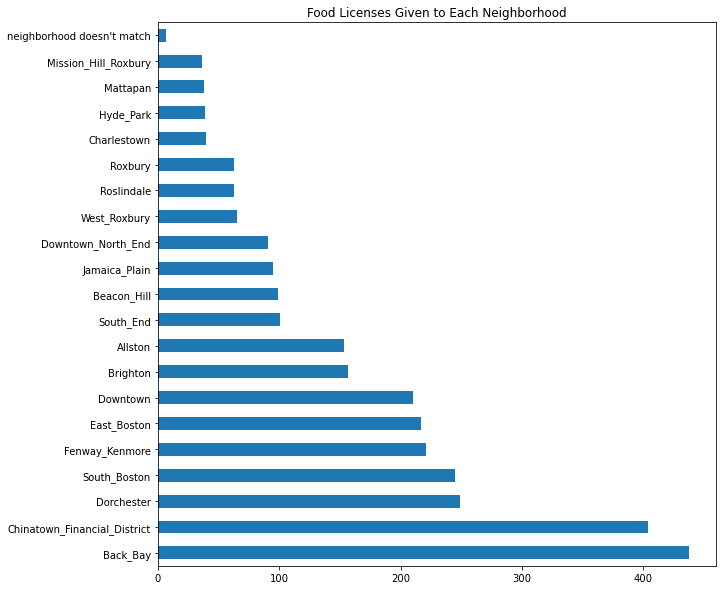

In [109]:
# plot number of neighborhood - food
import matplotlib.pyplot as plt

df_food['Neighborhood'].value_counts().plot(kind='barh', figsize = (10,10)
                                           , title = "Food Licenses Given to Each Neighborhood")
plt.savefig('1.png', bbox_inches='tight')
plt.show()

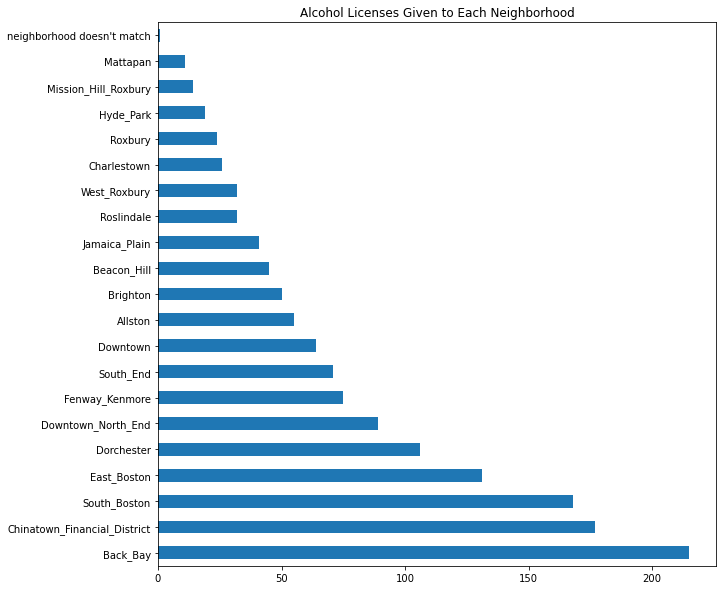

In [110]:
df_alcohol['Neighborhood'].value_counts().plot(kind='barh', figsize = (10,10)
                                              , title = "Alcohol Licenses Given to Each Neighborhood")
plt.savefig('2.png', bbox_inches='tight')
plt.show()

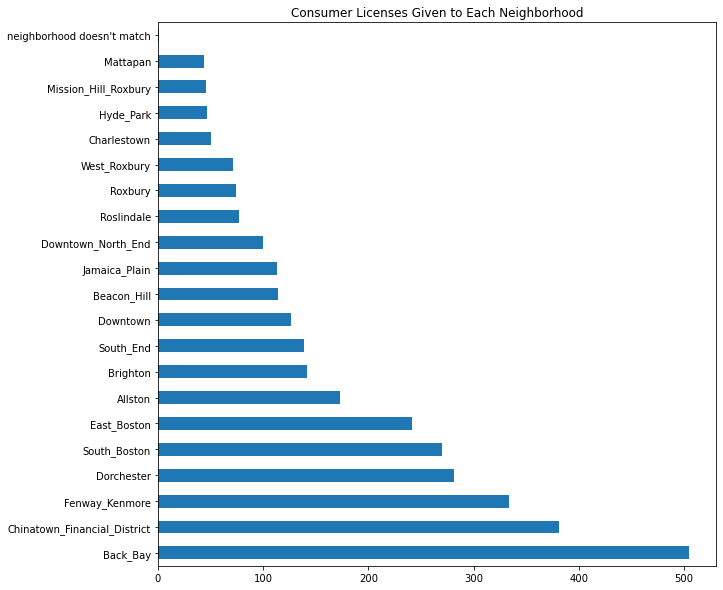

In [111]:
df_consumer['Neighborhood'].value_counts().plot(kind='barh', figsize = (10,10)
                                               , title = "Consumer Licenses Given to Each Neighborhood")
plt.savefig('3.png', bbox_inches='tight')
plt.show()

In [112]:
# find unmatched zipcodes and hardcode neighborhood to it
df_food_match = pd.read_csv("Food.csv")
zip_codes = df_food_match['ZIP'].unique()

def get_key_match(val):
    for key, value in zip_dict.items():
        if val == value: # if the zip matches
            return key
        if val in value: # if the zip is in the neighborhood
            return key
        
nei = zip_codes.copy()
nei

array(['02132', '02110', '02130', '02116', '02125', '02135', '02129',
       '02111', '02108', '02136', '02109', '02114', '02115', '02210',
       '02131', '02134', '02120', '02118', '02467', '02122', '02128',
       '02215', '02113', '02127', '02126', '02199', '02119', '02124',
       '02163', '02121', '02117', ' ', '02140', '02148', '02201', '02203'],
      dtype=object)

In [113]:
for i in range(len(zip_codes)):
    val = zip_codes[i]
    nei = get_key_match(val)
    zip_codes[i] = nei
    
zip_codes

array(['West_Roxbury', 'Chinatown_Financial_District', 'Jamaica_Plain',
       'Back_Bay', 'Dorchester', 'Brighton', 'Charlestown',
       'Chinatown_Financial_District', 'Beacon_Hill', 'Hyde_Park',
       'Chinatown_Financial_District', 'Downtown', 'Back_Bay',
       'South_Boston', 'Roslindale', 'Allston', 'Mission_Hill_Roxbury',
       'South_End', 'West_Roxbury', 'Dorchester', 'East_Boston',
       'Fenway_Kenmore', 'Downtown_North_End', 'South_Boston', 'Mattapan',
       'Back_Bay', 'Roxbury', 'Dorchester', 'Allston', 'Dorchester',
       'Chinatown_Financial_District', None, None, None, 'Downtown',
       'Downtown'], dtype=object)

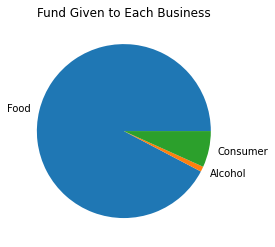

In [114]:
# fund given to different business

df_ff = pd.read_csv("food_fund.csv")
df_af = pd.read_csv("alcohol_fund.csv")
df_cf = pd.read_csv("consumer_fund.csv")
ff_len = len(df_ff)
af_len = len(df_af)
cf_len = len(df_cf)
fund_len = len(df_fund)

ff_prob = ff_len/fund_len
af_prob = af_len/fund_len
cf_prob = cf_len/fund_len
others_prob = ff_len + af_len + cf_len / fund_len # not included as in Deliverable 1

y = np.array([ff_prob, af_prob, cf_prob])
mylabels = ["Food", "Alcohol", "Consumer"]

plt.pie(y, labels = mylabels, radius = 1)
plt.title("Fund Given to Each Business")
plt.savefig('4.png', bbox_inches='tight')
plt.show()

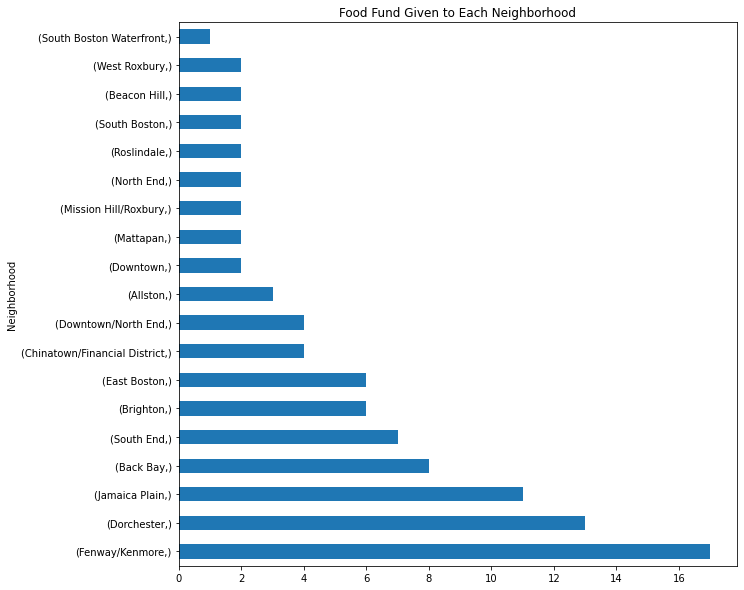

In [115]:
# fund given to different neighborhood

ff_nei_len = df_ff[['Neighborhood']].value_counts().plot(kind='barh', figsize = (10,10)
                                                        , title = "Food Fund Given to Each Neighborhood")
plt.savefig('5.png', bbox_inches='tight')
plt.show()

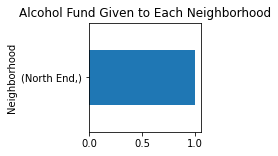

In [116]:
af_nei_len = df_af[['Neighborhood']].value_counts().plot(kind='barh', figsize = (2,2)
                                                        , title = "Alcohol Fund Given to Each Neighborhood")
plt.savefig('6.png', bbox_inches='tight')
plt.show()

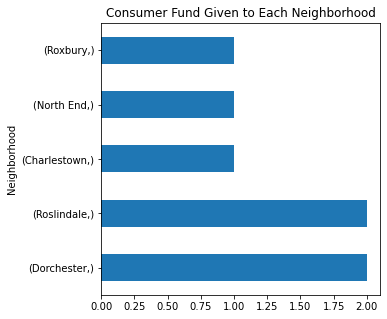

In [117]:
cf_nei_len = df_cf[['Neighborhood']].value_counts().plot(kind='barh', figsize = (5,5)
                                                        , title = "Consumer Fund Given to Each Neighborhood")
plt.savefig('7.png', bbox_inches='tight')
plt.show()